In [504]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings("ignore")
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
print('There was no errors')

There was no errors


# 1. Web Scraping

In [505]:
from bs4 import BeautifulSoup
import requests

In [506]:
# final = pd.DataFrame()
# for i in range(1,100):
#     url ='https://www.truecar.com/used-cars-for-sale/listings/location-santa-monica-ca/?page={}'.format(i)
#     headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
#     web = requests.get(url,headers=headers).text
    
#     soup = BeautifulSoup(web,'lxml')    
    
#     cars = soup.find_all('div',class_='card-content order-3 vehicle-card-body')
    
#     price =[]
#     name = []
#     year = []
#     miles = []
#     color = []
#     condition = []
#     for i in cars:
#         name.append(i.find('span',class_='truncate').text.strip())
#         year.append(i.find('span',class_='vehicle-card-year text-xs').text.strip())
#         price.append(i.find('span', {'data-test': 'vehicleListingPriceAmount'}).text.strip())
#         miles.append(i.find('div', {'class': 'truncate text-xs', 'data-test': 'vehicleMileage'}).text.strip())
#         color.append(i.find('div', {'class': 'vehicle-card-location mt-1 truncate text-xs', 'data-test': 'vehicleCardColors'}).text.strip())
#         condition.append(i.find('div', {'class': 'vehicle-card-location mt-1 text-xs', 'data-test': 'vehicleCardCondition'}).text.strip())
#     d = {'name':name,'year':year,'miles':miles,'color':color,'condition':condition,'price':price}   
#     df = pd.DataFrame(d)
#     final = pd.concat([final, df], ignore_index=True) 

In [507]:
# final

In [508]:
# final.to_csv('Car_web_scraped_dataset.csv',index=False)

In [509]:
datasetog = pd.read_csv('CarWS.csv')
df = datasetog.copy()

In [510]:
df

,name,year,miles,color,condition,price
0,Kia Forte,2022,"41,406 miles","Gray exterior, Black interior","No accidents reported, 1 Owner","$15,988"
1,Chevrolet Silverado 1500,2021,"15,138 miles","White exterior, Black interior","1 accident reported, 1 Owner","$38,008"
2,Toyota RAV4,2022,"32,879 miles","Silver exterior, Unknown interior","No accidents reported, 1 Owner","$24,988"
3,Honda Civic,2020,"37,190 miles","Blue exterior, Black interior","No accidents reported, 1 Owner","$18,998"
4,Honda Civic,2020,"27,496 miles","Black exterior, Black interior","No accidents reported, 1 Owner","$19,498"
...,...,...,...,...,...,...
2835,Ford Escape,2013,"98,601 miles","Silver exterior, Unknown interior","2 accidents reported, 3 Owners","$8,995"
2836,Mercedes-Benz R-Class,2009,"120,694 miles","Black exterior, Black interior","1 accident reported, 3 Owners","$9,495"
2837,Mercedes-Benz GLC,2022,"27,894 miles","Gray exterior, Gray interior","No accidents reported, 2 Owners","$29,999"
2838,Honda CR-V,2021,"50,220 miles","Gray exterior, Unknown interior","No accidents reported, 1 Owner","$22,992"


# 2. Data Cleaning

In [511]:
df = df.drop_duplicates()

In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2312 entries, 0 to 2839
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       2312 non-null   object
 1   year       2312 non-null   int64 
 2   miles      2312 non-null   object
 3   color      2312 non-null   object
 4   condition  2312 non-null   object
 5   price      2312 non-null   object
dtypes: int64(1), object(5)
memory usage: 126.4+ KB


In [513]:
df.isnull().sum()

name         0
year         0
miles        0
color        0
condition    0
price        0
dtype: int64

### Name column

In [514]:
df['name']=df['name'].str.lower()
df['brand'] = df['name']
df['name'].unique()

array(['kia forte', 'chevrolet silverado 1500', 'toyota rav4',
       'honda civic', 'honda accord', 'mercedes-benz glc', 'bmw 5 series',
       'jeep wrangler', 'porsche macan', 'buick cascada', 'bmw 3 series',
       'jeep grand cherokee', 'mercedes-benz c-class', 'porsche cayenne',
       'honda odyssey', 'bmw 7 series', 'kia k5', 'nissan kicks',
       'honda cr-v', 'chrysler pacifica', 'volkswagen tiguan',
       'nissan sentra', 'toyota camry', 'chevrolet malibu',
       'chevrolet volt', 'land rover range rover sport',
       'toyota highlander', 'kia optima', 'dodge charger',
       'toyota corolla', 'toyota tacoma', 'toyota 4runner',
       'ford mustang', 'ford f-150', 'honda pilot', 'nissan rogue sport',
       'infiniti qx60', 'volvo xc60', 'ford explorer',
       'chevrolet equinox', 'mercedes-benz gle', 'mercedes-benz s-class',
       'volvo s90', 'bmw x3', 'mercedes-benz gls', 'ford bronco sport',
       'mitsubishi outlander sport', 'volvo xc90', 'lexus rx',
       'mer

In [515]:
names = df['brand'].str.split().str[0].tolist()
un = list(set(names))  
horizontal = """','""".join(un)
horizontal

"alfa','buick','chrysler','volvo','pontiac','mazda','acura','rolls-royce','nissan','honda','volkswagen','toyota','porsche','karma','jeep','mitsubishi','mclaren','chevrolet','dodge','subaru','gmc','aston','saturn','genesis','kia','lincoln','jaguar','ford','bentley','scion','hyundai','maserati','cadillac','land','audi','infiniti','lexus','ram','fiat','bmw','mini','mercedes-benz"

In [516]:
oldname=['ram','bmw','hyundai','lincoln','jeep','mazda','cadillac','kia','toyota','mitsubishi','volkswagen','lexus','aston','dodge','saturn','land','buick','chevrolet','honda','mini','pontiac','jaguar','bentley','infiniti','acura','alfa','audi','gmc','genesis','karma','mclaren','ford','fiat','volvo','scion','rolls-royce','chrysler','mercedes','nissan','porsche','maserati','subaru']                                                              
newname= ['ram','bmw','hyundai','lincoln','jeep','mazda','cadillac','kia','toyota','mitsubishi','volkswagen','lexus','aston martin','dodge','saturn','land','buick','chevrolet','honda','mini','pontiac','jaguar','bentley','infiniti','acura','alfa','audi','gmc','genesis','karma','mclaren','ford','fiat','volvo','scion','rolls-royce','chrysler','mercedes','nissan','porsche','maserati','subaru']  
for old,new in zip(oldname,newname):
    df['brand'] = np.where(df['brand'].str.contains(old),new,df['brand'])
    
df['brand'].unique()    

array(['kia', 'chevrolet', 'toyota', 'honda', 'mercedes', 'bmw', 'jeep',
       'porsche', 'buick', 'nissan', 'chrysler', 'volkswagen', 'land',
       'dodge', 'ford', 'infiniti', 'volvo', 'mitsubishi', 'lexus',
       'hyundai', 'mazda', 'acura', 'maserati', 'subaru', 'audi',
       'jaguar', 'gmc', 'cadillac', 'ram', 'alfa', 'fiat', 'lincoln',
       'aston martin', 'mini', 'genesis', 'karma', 'scion', 'mclaren',
       'rolls-royce', 'bentley', 'pontiac', 'saturn'], dtype=object)

### Year Column

In [517]:
df['year'].info()

<class 'pandas.core.series.Series'>
Index: 2312 entries, 0 to 2839
Series name: year
Non-Null Count  Dtype
--------------  -----
2312 non-null   int64
dtypes: int64(1)
memory usage: 36.1 KB


In [518]:
df['year'].describe()

count    2312.000000
mean     2018.873702
std         3.466794
min      2000.000000
25%      2017.000000
50%      2020.000000
75%      2021.000000
max      2024.000000
Name: year, dtype: float64

### Miles column

In [520]:
df['miles'] = df['miles'].str.strip('miles').str.replace(',','')
df['miles'] = df['miles'].astype(int)

In [521]:
df['miles']

0        41406
1        15138
2        32879
3        37190
4        27496
         ...  
2835     98601
2836    120694
2837     27894
2838     50220
2839     26510
Name: miles, Length: 2312, dtype: int32

### Color Column


In [522]:
df['exterior'] = df['color'].str.extract(r'(\D+),')[0].astype(object)
df['interior'] = df['color'].str.extract(r',(\D+)')[0].astype(object)
df['exterior'] = df['exterior'].str.strip('exterior').str.replace(' ','')
df['interior'] = df['interior'].str.strip('interior').str.replace(' ','')
df = df.drop(columns=['color'])

### Condition Column


In [524]:
df['accidents'] = df['condition'].str.extract(r'(\d+)\s*accident').replace(np.nan,0).astype(int)
df['past_owners'] = df['condition'].str.extract(r'reported,\s*(\d+)').astype(int)
df = df.drop(columns=['condition'])

### Price column


In [526]:
df['price']=df['price'].str.strip('$').str.replace(',','').astype(int)

####  unknown values

In [528]:
df['interior'] = df['interior'].replace('Unknown',np.nan)
df['exterior'] = df['exterior'].replace('Unknown',np.nan)

In [527]:
df

,name,year,miles,price,brand,exterior,interior,accidents,past_owners
0,kia forte,2022,41406,15988,kia,Gray,Black,0,1
1,chevrolet silverado 1500,2021,15138,38008,chevrolet,White,Black,1,1
2,toyota rav4,2022,32879,24988,toyota,Silver,Unknown,0,1
3,honda civic,2020,37190,18998,honda,Blue,Black,0,1
4,honda civic,2020,27496,19498,honda,Black,Black,0,1
...,...,...,...,...,...,...,...,...,...
2835,ford escape,2013,98601,8995,ford,Silver,Unknown,2,3
2836,mercedes-benz r-class,2009,120694,9495,mercedes,Black,Black,1,3
2837,mercedes-benz glc,2022,27894,29999,mercedes,Gray,Gray,0,2
2838,honda cr-v,2021,50220,22992,honda,Gray,Unknown,0,1


# 3. EDA

### Univariate analysis

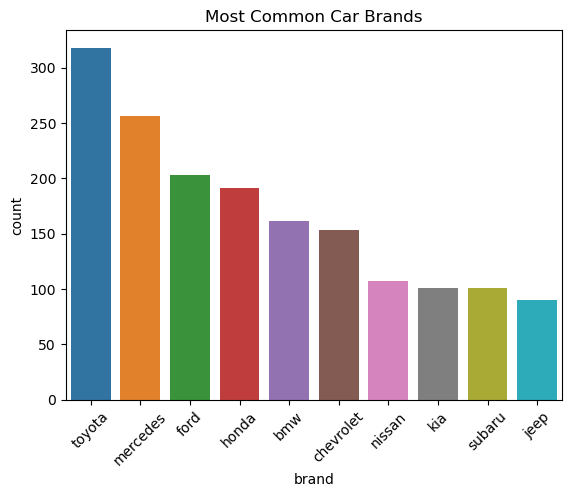

In [529]:
a = df['brand'].value_counts().head(10).reset_index()
sns.barplot(data=a, x='brand', y='count')
plt.title('Most Common Car Brands')
plt.xticks(rotation = 45);

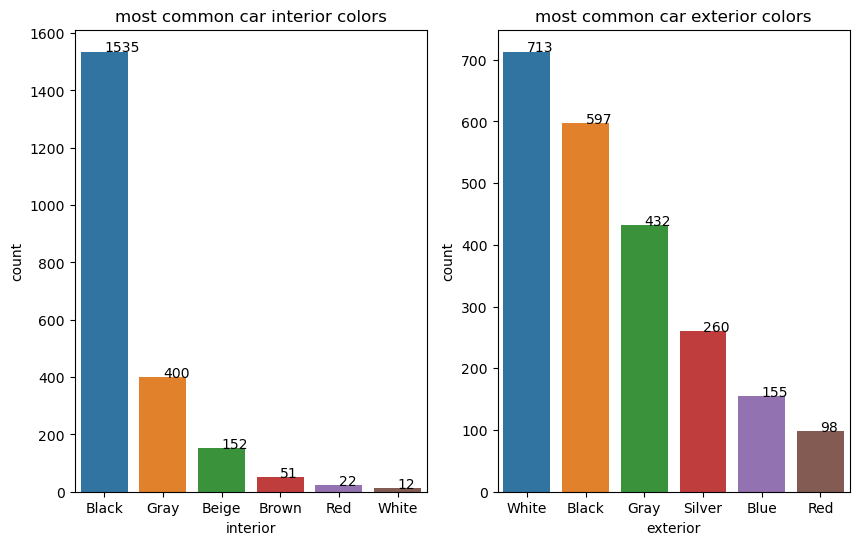

In [530]:
colors = ['interior','exterior']
plt.figure(figsize=(10,6))
for i,col in enumerate(colors):
    plt.subplot(1,2,i+1)
    b = df[col].value_counts().head(6).reset_index()
    sns.barplot(data = b,x=b[col],y=b['count'])
    plt.title(f'most common car {col} colors')
    for i,data in enumerate(b['count']):
        plt.text(x=i,y=data,s=f'{data}')

Text(0.5, 1.0, 'distribution of cars by years')

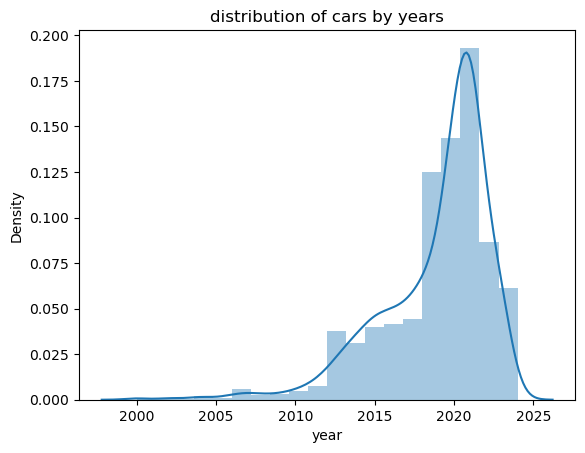

In [531]:
sns.distplot(df['year'],bins=20)
plt.title('distribution of cars by years')

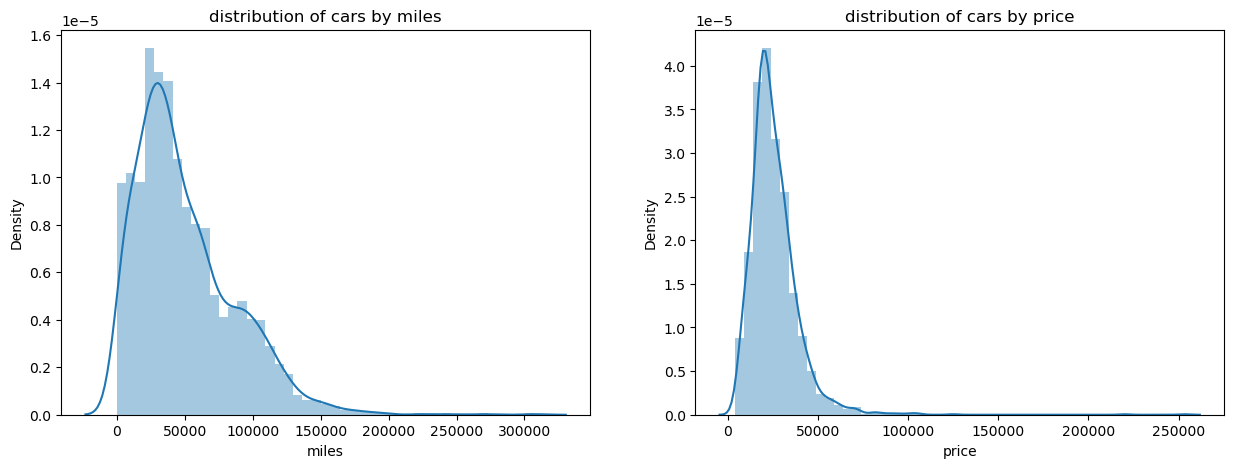

In [532]:
d = ['miles','price']
plt.figure(figsize=(15,5))
for i,col in enumerate(d):
    plt.subplot(1,2,i+1)
    sns.distplot(df[col])
    plt.title(f'distribution of cars by {col}')

#### Removing outliers and correcting skewness

In [533]:
df[d].skew()

miles    1.212093
price    4.334706
dtype: float64

In [535]:
upper1 = df['miles'].quantile(0.999)
lower1 = df['miles'].quantile(0.001)
df[df['miles']>=upper1].count()
df[df['miles']<=lower1].count()
upper = df['price'].quantile(0.999)
lower = df['price'].quantile(0.001)
df = df[(df['price']>=lower) & (df['price']<=upper) & (df['name']!='karma') & (df['miles']<=upper1) & (df['miles']>=lower1)]  

,name,year,miles,price,brand,exterior,interior,accidents,past_owners
0,kia forte,2022,41406,15988,kia,Gray,Black,0,1
1,chevrolet silverado 1500,2021,15138,38008,chevrolet,White,Black,1,1
2,toyota rav4,2022,32879,24988,toyota,Silver,NaN,0,1
3,honda civic,2020,37190,18998,honda,Blue,Black,0,1
4,honda civic,2020,27496,19498,honda,Black,Black,0,1
...,...,...,...,...,...,...,...,...,...
2835,ford escape,2013,98601,8995,ford,Silver,NaN,2,3
2836,mercedes-benz r-class,2009,120694,9495,mercedes,Black,Black,1,3
2837,mercedes-benz glc,2022,27894,29999,mercedes,Gray,Gray,0,2
2838,honda cr-v,2021,50220,22992,honda,Gray,NaN,0,1


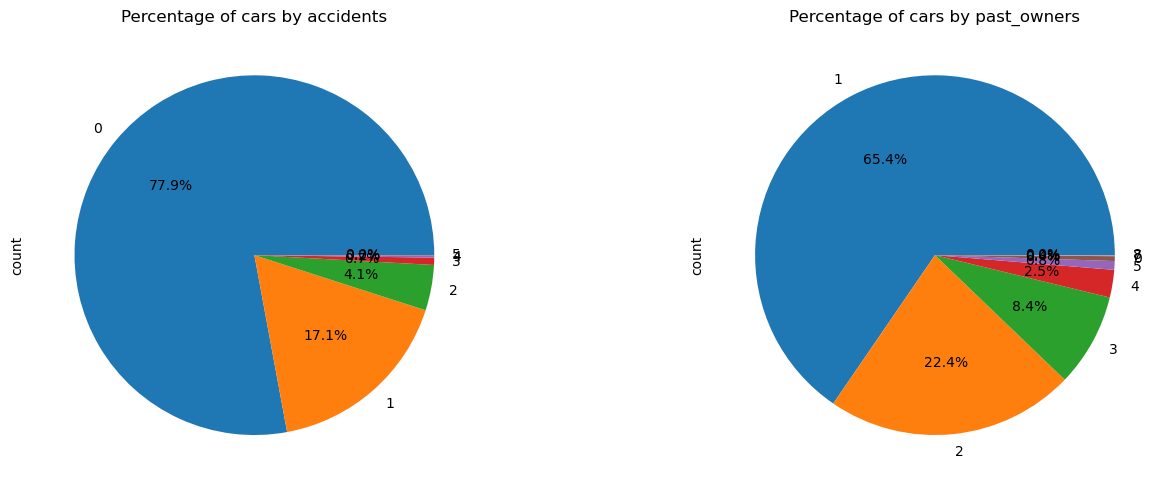

In [537]:
e = ['accidents','past_owners']
plt.figure(figsize=(15,5))
for i,col in enumerate(e):
    plt.subplot(1,2,i+1)
    df[col].value_counts().plot.pie(autopct='%.1f%%')
    plt.title(f'Percentage of cars by {col}')
plt.tight_layout()     

### Bivariate Analysis

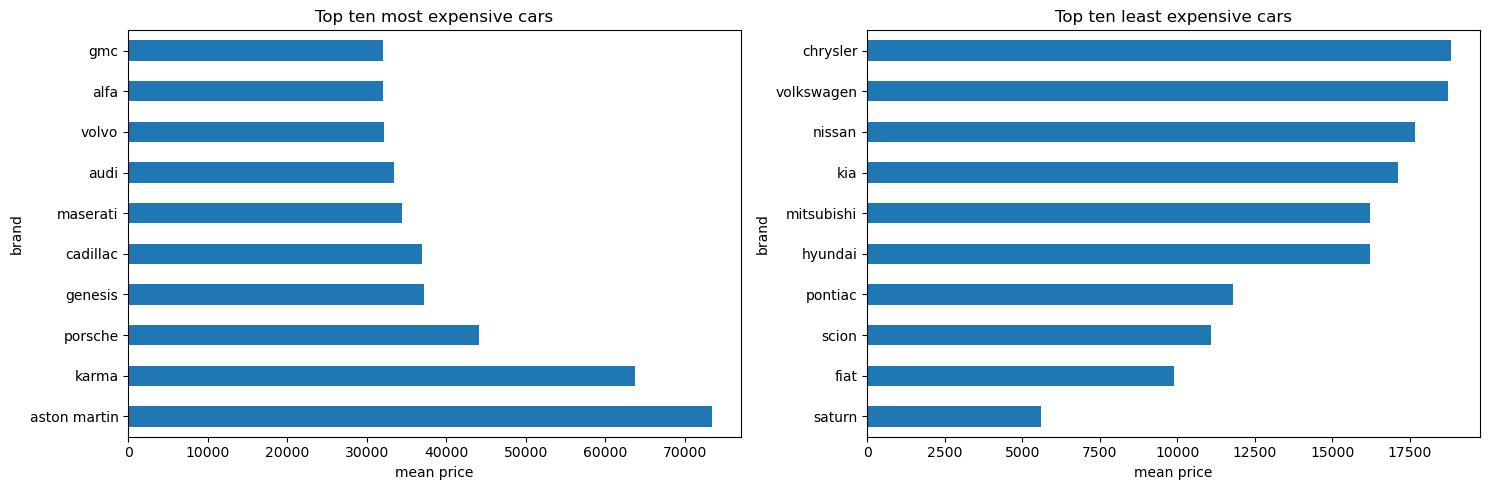

In [538]:
f = df.groupby('brand')['price'].mean().sort_values(ascending=False).head(10)
g= df.groupby('brand')['price'].mean().sort_values(ascending=True).head(10)

fig, (a,b) = plt.subplots(1,2,figsize=(15,5))

f.plot(kind='barh',ax=a)
g.plot(kind='barh',ax=b)
a.set_title('Top ten most expensive cars')
b.set_title('Top ten least expensive cars')
a.set_xlabel('mean price')
b.set_xlabel('mean price')

plt.tight_layout()

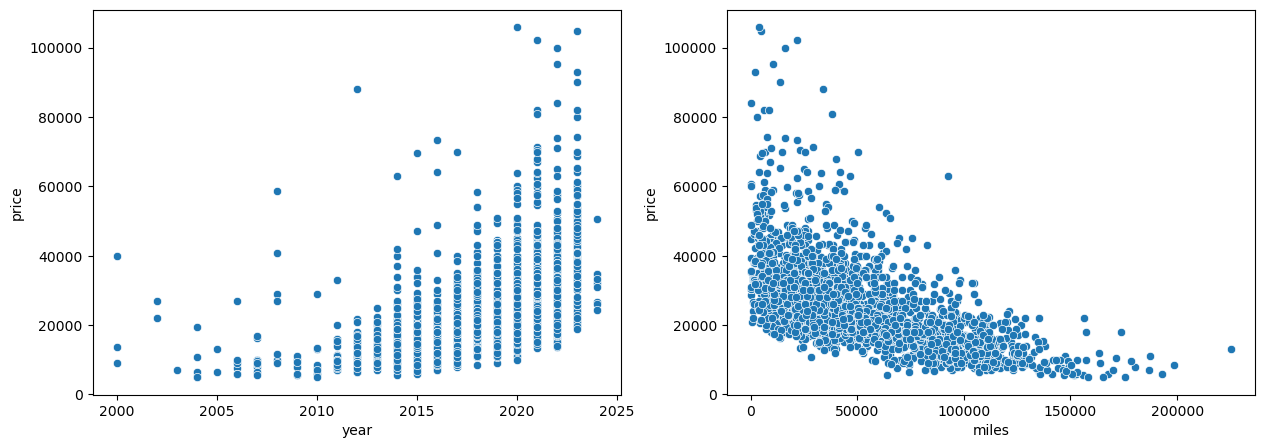

In [539]:
h =['year','miles']
plt.figure(figsize=(15,5))
for i,col in enumerate(h):
    plt.subplot(1,2,i+1)
    sns.scatterplot(x=df[col],y=df['price'])

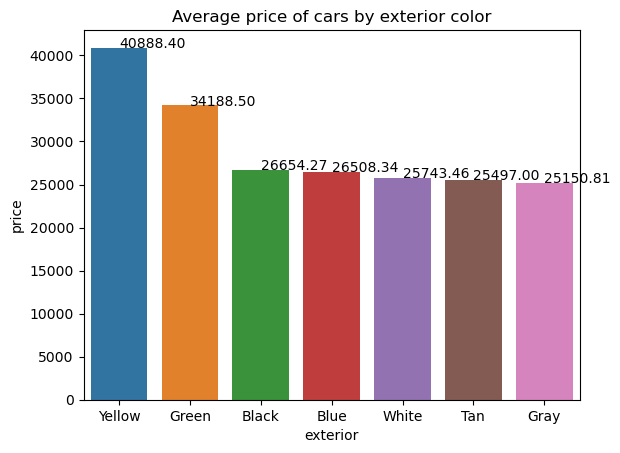

In [540]:
i = df.groupby('exterior')['price'].mean().sort_values(ascending=False).head(7).reset_index()               
sns.barplot(data=i,x=i['exterior'],y=i['price'])
plt.title('Average price of cars by exterior color')
for i,data in enumerate(i['price']):
    plt.text(i,data,s= f'{data:.2f}')
    

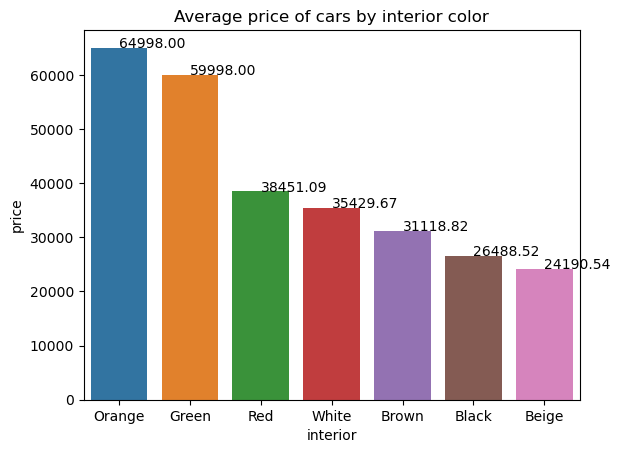

In [541]:
j = df.groupby('interior')['price'].mean().sort_values(ascending=False).head(7).reset_index()    
sns.barplot(data=j,x=j['interior'],y=j['price'])
plt.title('Average price of cars by interior color')

for i,data in enumerate(j['price']):
    plt.text(i,data,s= f'{data:.2f}')

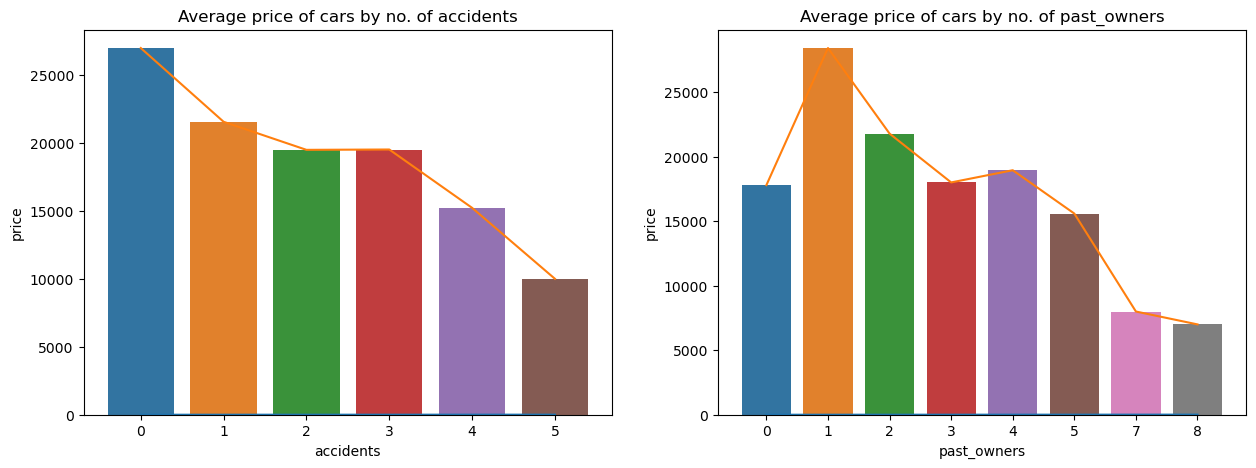

In [542]:
k =['accidents','past_owners']
plt.figure(figsize=(15,5))
for i,col in enumerate(k):
    plt.subplot(1,2,i+1)
    k= df.groupby(col)['price'].mean().reset_index()
    sns.barplot(data = k,x=k[col],y=k['price'])
    plt.title(f'Average price of cars by no. of {col}')
    plt.plot(k)

# 4. ML Model Building

##  4.1 Data preprocessing

In [544]:
dataset = df.copy()

In [545]:
dataset

,name,year,miles,price,brand,exterior,interior,accidents,past_owners
0,kia forte,2022,41406,15988,kia,Gray,Black,0,1
1,chevrolet silverado 1500,2021,15138,38008,chevrolet,White,Black,1,1
2,toyota rav4,2022,32879,24988,toyota,Silver,NaN,0,1
3,honda civic,2020,37190,18998,honda,Blue,Black,0,1
4,honda civic,2020,27496,19498,honda,Black,Black,0,1
...,...,...,...,...,...,...,...,...,...
2835,ford escape,2013,98601,8995,ford,Silver,NaN,2,3
2836,mercedes-benz r-class,2009,120694,9495,mercedes,Black,Black,1,3
2837,mercedes-benz glc,2022,27894,29999,mercedes,Gray,Gray,0,2
2838,honda cr-v,2021,50220,22992,honda,Gray,NaN,0,1


In [546]:
dataset.describe()

,year,miles,price,accidents,past_owners
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,2018.888261,49614.555217,25649.236522,0.281739,1.498696
std,3.442328,35252.095181,12226.616896,0.594096,0.837101
min,2000.000000,43.000000,4966.000000,0.000000,0.000000
25%,2017.000000,23776.000000,17991.000000,0.000000,1.000000
50%,2020.000000,40703.000000,22999.000000,0.000000,1.000000
75%,2021.000000,69013.500000,30999.000000,0.000000,2.000000
max,2024.000000,225260.000000,105888.000000,5.000000,8.000000


### Spliting the dataset in X and y

In [547]:
X = dataset.drop(columns='price').values
y = np.log(dataset['price'])

In [548]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
imputer.fit(X[:,[4,5]])
X[:,[4,5]]=imputer.transform(X[:,[4,5]])
print(X)

[['kia forte' 2022 41406 ... 'Black' 0 1]
 ['chevrolet silverado 1500' 2021 15138 ... 'Black' 1 1]
 ['toyota rav4' 2022 32879 ... 'Black' 0 1]
 ...
 ['mercedes-benz glc' 2022 27894 ... 'Gray' 0 2]
 ['honda cr-v' 2021 50220 ... 'Black' 0 1]
 ['honda civic' 2021 26510 ... 'Black' 0 1]]


In [549]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [550]:
# FEATURE SCALING
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,[1,2]] = sc.fit_transform(X_train[:,[1,2]])
X_test[:,[1,2]] = sc.fit_transform(X_test[:,[1,2]])

## 4.2 Prediction model building


In [552]:
#Importing libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor 
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [553]:
# Encoding Categorical Columns
s = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first'), [0, 3, 4,5])   
     ],remainder='passthrough')

In [554]:
# SVR Model
s1 = SVR(kernel='rbf')
pipe1 = Pipeline([('s',s),('s1',s1)])
pipe1.fit(X_train,y_train)
y_pred1 = pipe1.predict(X_test)
r1 = r2_score(y_test,y_pred1)
m1 = mean_absolute_error(y_test,y_pred1)

In [555]:
#Decision Tree Model
s2 = DecisionTreeRegressor(max_depth=15,random_state=42)
pipe2 = Pipeline([('s',s),('s2',s2)])
pipe2.fit(X_train,y_train)
y_pred2 = pipe2.predict(X_test)
r2 = r2_score(y_test,y_pred2)
m2 = mean_absolute_error(y_test,y_pred2)

In [556]:
# XGBoost Model
s3 = XGBRegressor(n_estimators=200,max_depth=20,learning_rate=0.2)
pipe = Pipeline([('s',s),('s3',s3)])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
r = r2_score(y_test,y_pred)
m = mean_absolute_error(y_test,y_pred)

In [557]:
#Random Forest Model
S4 = RandomForestRegressor(n_estimators = 100,random_state = 5)
pipe4 = Pipeline([('s',s),('S4',S4)])
pipe4.fit(X_train,y_train)
y_pred4 = pipe4.predict(X_test)
r4 = r2_score(y_test,y_pred4)
m4 = mean_absolute_error(y_test,y_pred4)

In [558]:
#Gradient Boost Model
s5 =  GradientBoostingRegressor(n_estimators=500)

pipe5 = Pipeline([('s',s), ('s5',s5)])
pipe5.fit(X_train,y_train)

y_pred5 = pipe5.predict(X_test)

r5 = r2_score(y_test,y_pred5)
m5 = mean_absolute_error(y_test,y_pred5)

# 5.Visualising results

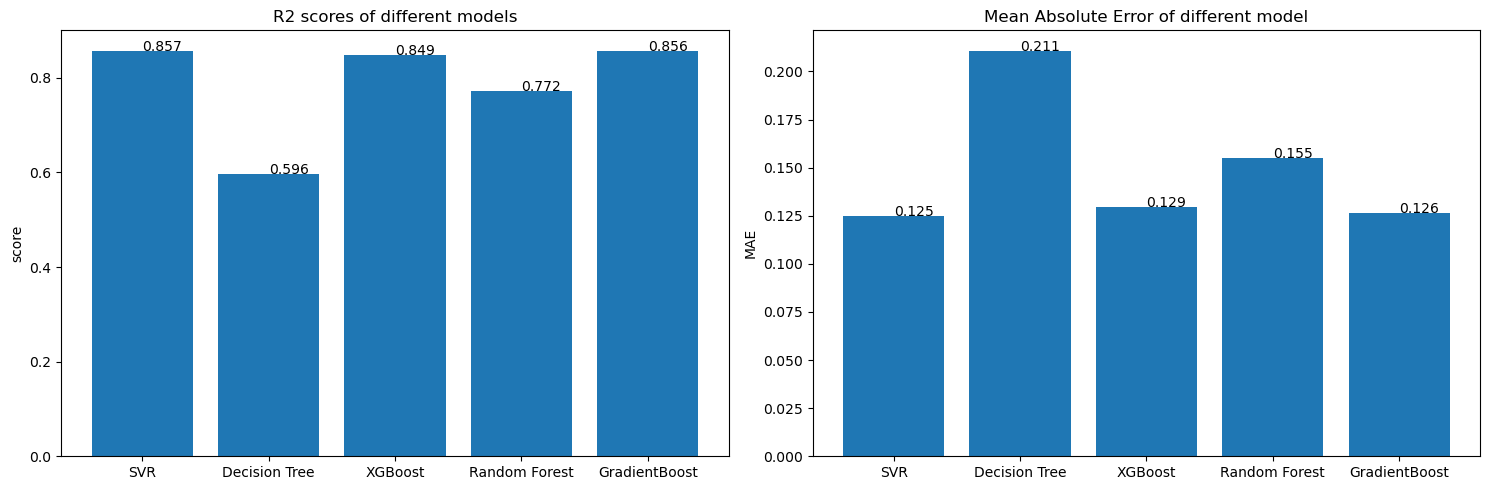

In [559]:
model = ['SVR','Decision Tree','XGBoost','Random Forest','GradientBoost']
rscores = [r1,r2,r,r4,r5]
mae = [m1,m2,m,m4,m5]
fig,(a,b) = plt.subplots(1,2,figsize=(15,5))

a.bar(model,rscores)
a.set_title('R2 scores of different models')
a.set_ylabel('score')

b.bar(model, mae)
b.set_title('Mean Absolute Error of different model')
b.set_ylabel('MAE')
for index,data in enumerate(rscores):
    a.text(x=index,y=data,s=f'{data:.3}')
for index,data in enumerate(mae):
    b.text(x=index,y=data,s=f'{data:.3}')    
plt.tight_layout()

# 6. Exporting the model


In [560]:
import pickle

In [562]:
pickle.dump(dataset,open('df.pkl','wb'))

In [568]:
pickle.dump(pipe1,open('SVR.pkl','wb'))

# End